<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/04_podstawy_sklearn/06_regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Regresja Logistyczna (Logistic Regression) - wprowadzenie¶
Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression.

Przykłady zastosowań:
przewidywanie czy mail jest spamem, czy też nie
przewidywanie czy użytkownik kliknie w reklamę
przewidywanie czy nowotwór jest złośliwy czy też nie
przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
przewidywanie czy transakcja jest próbą oszustwa
Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem: $$sigmoid(x) = \frac{1}{1+e^{-x}}$$

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
sns.set()
np.random.seed(10)
np.set_printoptions(precision = 6, suppress = True)


In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [14]:
sigmoid(0.000001)

0.50000025

Text(0.5, 1.0, 'Sigmoid Function')

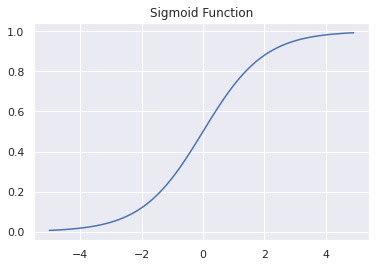

In [15]:
X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')


Następnie rozważmy model liniowy $Y = w_0 + w_1X_1$. Podstawiając to do funkcji sigmoid otrzymujemy:$$LOG\_REG(Y) = \frac{1}{1 + e^{-(w_0 + w_1X_1)}}$$Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

In [18]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [19]:
# wyodrębnienie danych oraz zmiennej docelowej

X = data.data
y = data.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [24]:
df = pd.DataFrame(data = X, columns = data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [30]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.999468, 0.000532],
       [1.      , 0.      ],
       [0.008604, 0.991396],
       [0.026493, 0.973507],
       [0.004281, 0.995719],
       [0.213978, 0.786022],
       [0.015859, 0.984141],
       [0.99856 , 0.00144 ],
       [0.972011, 0.027989],
       [0.113898, 0.886102],
       [1.      , 0.      ],
       [0.00513 , 0.99487 ],
       [0.004494, 0.995506],
       [0.336711, 0.663289],
       [0.00053 , 0.99947 ],
       [0.004055, 0.995945],
       [0.018831, 0.981169],
       [0.631563, 0.368437],
       [0.999988, 0.000012],
       [0.107011, 0.892989],
       [0.059887, 0.940113],
       [0.148638, 0.851362],
       [0.0009  , 0.9991  ],
       [1.      , 0.      ],
       [0.99577 , 0.00423 ],
       [0.095659, 0.904341],
       [0.000736, 0.999264],
       [0.262119, 0.737881],
       [1.      , 0.      ],
       [0.003242, 0.996758],
       [0.998596, 0.001404],
       [1.      , 0.      ],
       [0.001112, 0.998888],
       [0.005434, 0.994566],
       [0.9199

In [33]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

Accuracy: 0.951048951048951


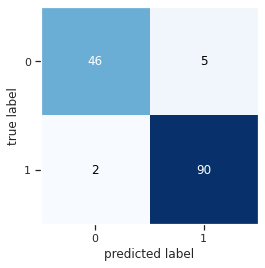

In [35]:
# ocena modelu
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [36]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns= ['pred_0', 'pred_1'], index = ['true_1','true_0'])
    
    fig = ff.create_annotated_heatmap(z= cm.values, x=list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice', showscale = True, reversescale = True)
    fig.update_layout(width = 500, height = 500, title = f'Confusion Matrix, Accuracy{acc:.4f}', font_size = 16)
    fig.show()

plot_confusion_matrix(cm)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.90      0.93        51
      benign       0.95      0.98      0.96        92

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

